In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def display(img,cmap="gray"):
    fig = plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap="gray")

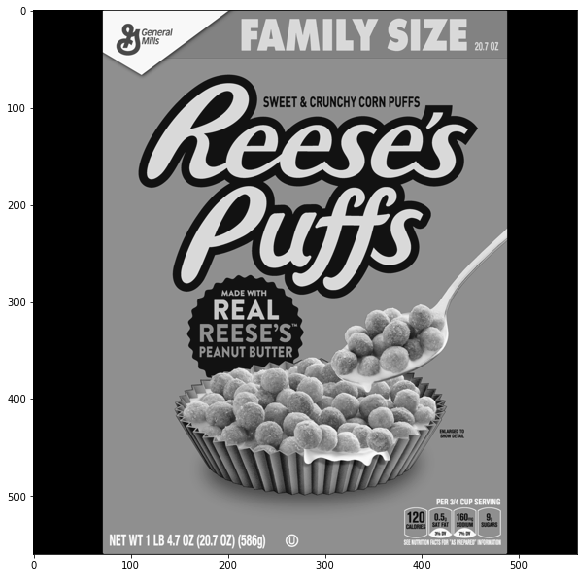

In [3]:
reeses=cv2.imread('DATA/reeses_puffs.png',0)
display(reeses,cmap="gray")

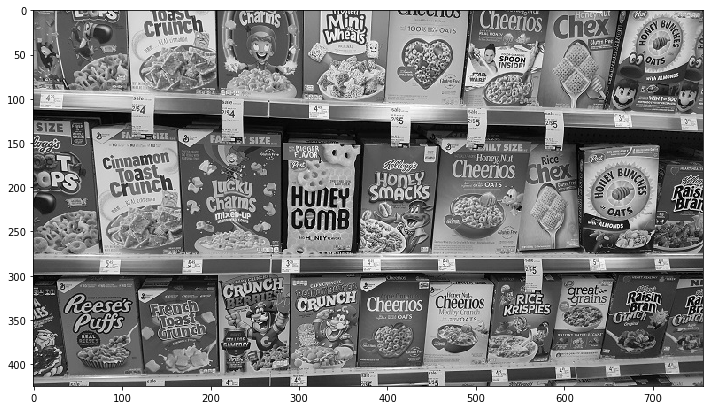

In [4]:
cereals=cv2.imread('DATA/many_cereals.jpg',0)
display(cereals)

In [5]:
orb=cv2.ORB_create()

In [6]:
kp1,des1=orb.detectAndCompute(reeses,None)

In [7]:
kp2,des2=orb.detectAndCompute(cereals,None)

In [8]:
bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [9]:
matches=bf.match(des1,des2)

In [10]:
matches=sorted(matches,key=lambda x:x.distance)

In [11]:
reeses_matches=cv2.drawMatches(reeses,kp1,cereals,kp2, matches[:25],None,flags=2)

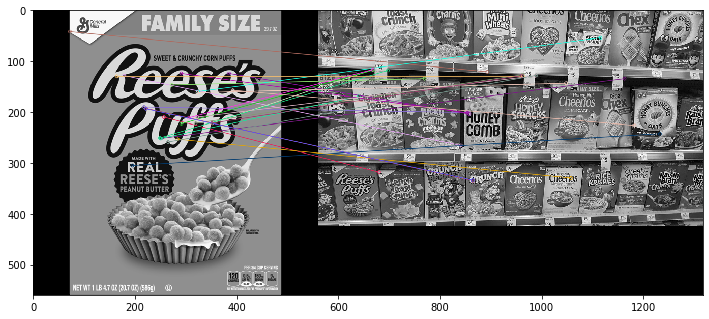

In [12]:
display(reeses_matches)

In [14]:
#sift detectors - scale invariant feature transform
sift=cv2.xfeatures2d.SIFT_create()

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'

In [ ]:
kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2=sift.detectAndCompute(cereals,None)


In [ ]:
bf=cv2.BFMatcher()

In [ ]:
des1
